# DTEK0042 Exercise 3
    Group Members:
    1. Juha, Virta
    2. Amin, Rezaei
    3. YU-HAO, TSAI

*** Note for Google Colab Users ***
     Because Google Colab doesn't have a button to convert your notebook to .html format here is a quick work around:
   1. open a new google colab notebook
   2. in the files section in google colab, upload the .ipynb file you want to be converted to .html
   3. in your new open notebook run this command in an empty cell: !jupyter nbconvert --to html YourFileName.ipynb
   4. after the command is finished running refresh the page
   5. In your files section you should see your original .ipynb file that you uploaded and then a .html file of that same notebook.
   6. download the .html file and you're good to go!

In this exercise, you are required to analyze a PPG signal step-by-step as outlined below.  The deliverables for this exercise are a jupyter notebook and a .html file exported form the notebook. The notebook should includes your code, observations, graphs, and conclusions made upon analyzing the given PPG signal. Please provide caption and description for every figure. 

## 1- library Imports

In [1]:
import scipy as sp
import numpy as np
import matplotlib.pyplot as plt

# 2- Data Import and plotting
* Import the PPG signal data “PPG_record.txt” into your python environment and store it in a variable named “PPG_data”.
* The first column contains timestamp of samples, the second one contains red, the third one contains infrared (IR), and the last column contains green sensor data. 
* Take IR signal and store it in a variable called “PPG_sig”.  
* Note: the sampling frequency of this signal is 132 Hz. 
* Plot the IR signal stored in "PPG_sig" VS Time in seconds
* When plotting the data "PPG_sig" vs time in seconds, use the function np.linspace to make a seconds array using the length of "PPG_sig" and the sampling frequency of 132 Hz. Do not use the timestamp column of the data.

     HINT: 
         PPG_data = np.loadtxt(the directory of the PPG Data) 
         
         or
         
         PPG_data = pd.read_csv(the directory of the PPG Data, names = [name for each column])
         * Note: If you are using pandas to load into data, we'd recommend you convert pandas series data to numpy type for further analysis

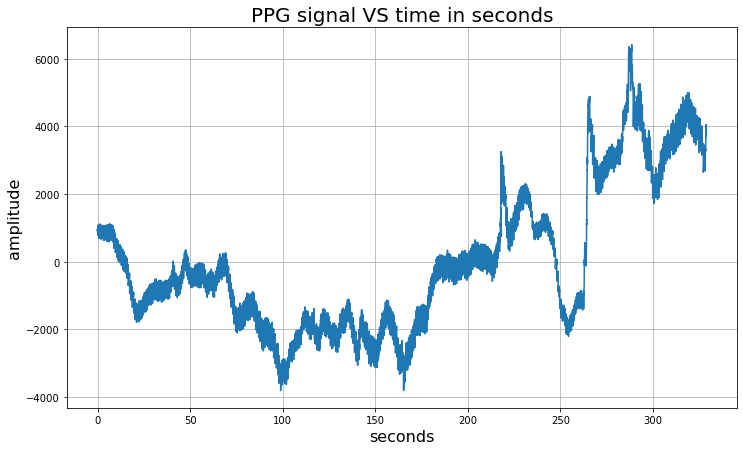

In [2]:
#code
PPG_data = np.loadtxt('PPG_record.txt', delimiter= ',')

#take third column (IR) of PPG_record 
PPG_sig = PPG_data[:, 2]
#remove mean
PPG_sig = PPG_sig-np.mean(PPG_sig)

Fs = 132

#convert samples to time in seconds
seconds_time=np.linspace(0,(len(PPG_sig)/Fs),len(PPG_sig))

plt.figure(figsize=(12,7))
plt.grid()
plt.plot(seconds_time, PPG_sig)
plt.title("PPG signal VS time in seconds",fontsize=20)
plt.xlabel("seconds",fontsize=16)
plt.ylabel("amplitude",fontsize=16)
plt.xticks(np.arange(0,(len(PPG_sig)/Fs)+1,step=50))
plt.show()


# 3- Compute power spectral density (PSD)

 * Compute power spectral density (PSD) using the Welch method provided by scipy package.  Select only the frequencies between 0.7 and 3Hz since the human heart rate typically does not go beyond these limits. 
 * Plot the limited PSD versus frequency
 * Find the dominant PSD value and its corresponding frequency. 
 * Store the value of the found frequency component in a variable named “dominant_freq”. 
 * Reference:
 https://docs.scipy.org/doc/scipy/reference/generated/scipy.signal.welch.html#scipy.signal.welch
 
      
      HINT: 
        PSD_freqs , PSD = scipy.signal.welch() 
        Set the nperseg parameter to be = 10*Fs
        

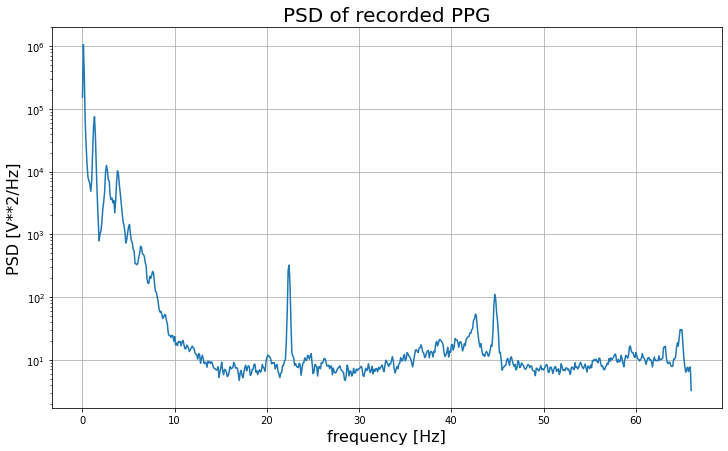

1.3


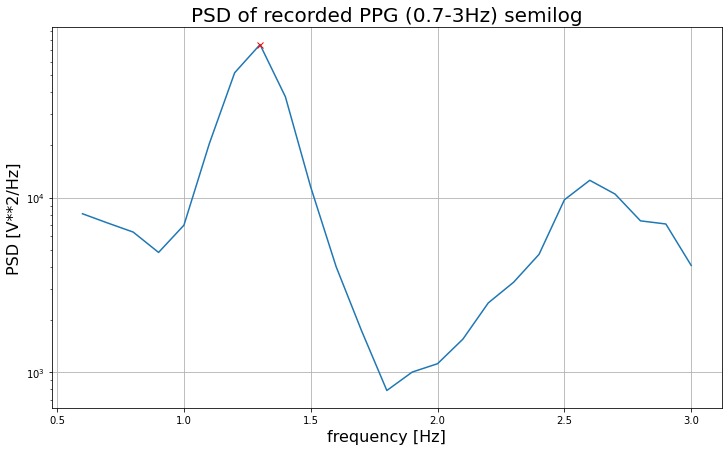

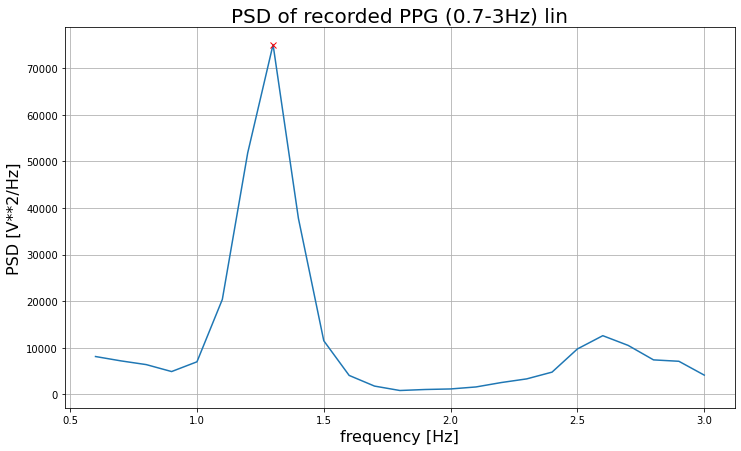

In [3]:
# code
from scipy import signal

###_function to find indexes of frequncies_###
def find_index_range(data,low_limit,high_limit):
    count = 0
    indexl = 0
    indexu = 0
    for i in data:
        if i <= low_limit:
            indexl = count
        if i > high_limit:
            indexu = count
            break
        count += 1
    return(indexl,indexu)

###_function to find index dominant of frequncy_###
def find_dom_freq_index(data):
    peak_value = data[0]
    for i in data:
        if data[i] > peak_value:
            peak_index = i
    return(peak_index)

#index_low, index_high = find_index_range(fx,0.5,40)

#calculate PSD
PSD_freqs, PSD_den = sp.signal.welch(PPG_sig, Fs, nperseg=(10*Fs))

fx, fy = PSD_freqs, PSD_den

plt.figure(figsize=(12,7))
plt.semilogy(fx, fy)
plt.title("PSD of recorded PPG",fontsize=20)
plt.xlabel("frequency [Hz]",fontsize=16)
plt.ylabel("PSD [V**2/Hz]",fontsize=16)
plt.grid()
plt.show()

#take only 0,7Hz-3Hz
index_low, index_high = find_index_range(PSD_freqs,0.7,3)
PSD_freqs_07_3 = PSD_freqs[index_low:index_high]
PSD_den_07_3 = PSD_den[index_low:index_high]

#find dominant frequency
max_freq_index = np.argmax(PSD_den_07_3, axis=0)
#print(max_freq_index)
dom_freq = PSD_freqs_07_3[max_freq_index]
print(dom_freq)

fx, fy = PSD_freqs_07_3, PSD_den_07_3

plt.figure(figsize=(12,7))
plt.semilogy(fx,fy)
plt.plot(fx[max_freq_index],fy[max_freq_index],"rx")
plt.title("PSD of recorded PPG (0.7-3Hz) semilog",fontsize=20)
plt.xlabel("frequency [Hz]",fontsize=16)
plt.ylabel("PSD [V**2/Hz]",fontsize=16)
plt.grid()
plt.show()

plt.figure(figsize=(12,7))
plt.title("PSD of recorded PPG (0.7-3Hz) lin", fontsize=20)
plt.xlabel("frequency [Hz]",fontsize=16)
plt.ylabel("PSD [V**2/Hz]",fontsize=16)
plt.plot(fx,fy)
plt.plot(fx[max_freq_index],fy[max_freq_index],"rx")
plt.grid()
plt.show()


# 4- Band Pass Filter Design and Filtering of PPG signal
*  Design a band pass filter. Use Butterworth filter of order 4 with cutoff frequencies equal to (dominant_freq – 0.3) and (dominant_freq + 0.3).

* Filter the original PPG signal with the designed filter. 

* Plot the filtered PPG signal showing heartbeats in the form of a sinusoid


* Note: the documentation of scipy package online is very comprehensive and informative. there are examples that 
  you can easily follow and use to solve the given exercise here. 
  https://docs.scipy.org/doc/scipy-0.14.0/reference/signal.html    
    
   
      HINT: 
        from scipy.signal import butter, filtfilt, freqz
    

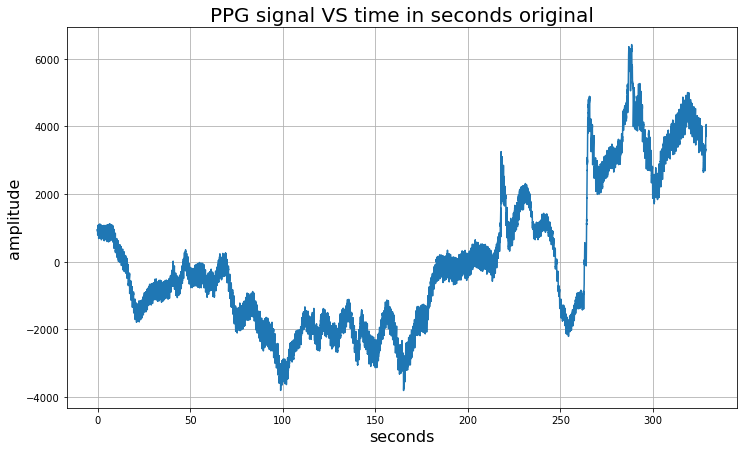

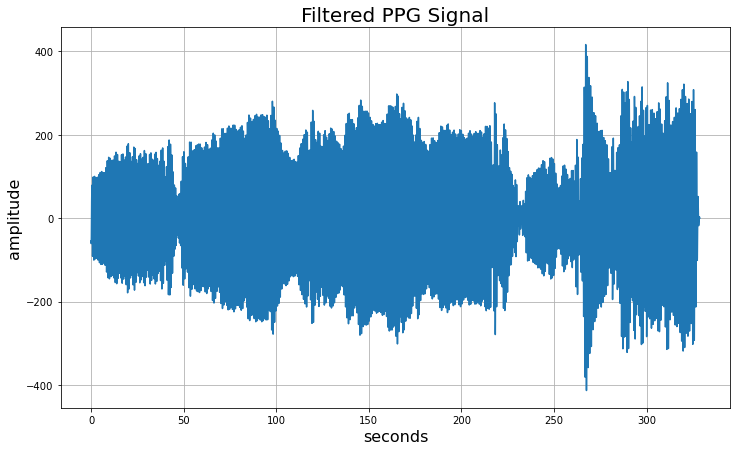

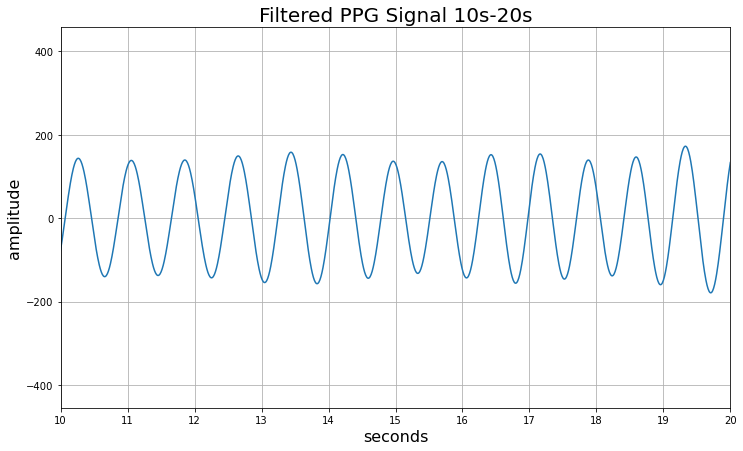

'\n###_FFT of the PPG_###\n\n###_function for fourier transform_###\ndef fourier_transform(data, fs):\n    sig_len=len(data)\n    fx = fx=fftpack.rfftfreq(sig_len,1/fs)\n    fy=np.abs(fftpack.rfft(data))\n    return(fx,fy)\n\n###_frequency domain of PPG signal_###\nfx, fy = fourier_transform(PPG_sig, Fs)\n\nplt.figure(figsize=(12,7))\nplt.title("Frequency Domain of PPG Signal")\nplt.xlabel("Frequency")\nplt.ylabel("Amplitude")\nplt.plot(fx,np.abs(fy))\nplt.xlim([0,2])\nplt.show()\n        \n###_frequency domain of PPG signal (0,7-3Hz)_###\nfx, fy = fourier_transform(PPG_sig, Fs)\nindex_low, index_high = find_index_range(fx,0.7,3)\n\nplt.figure(figsize=(12,7))\nplt.title("Frequency Domain of PPG Signal 0,7Hz-3Hz")\nplt.xlabel("Frequency")\nplt.ylabel("Amplitude")\nplt.plot(fx[index_low:index_high],np.abs(fy[index_low:index_high]))\nplt.show()\n\n###_frequency domain of PPG signal (1-1,6Hz)_###\nfx, fy = fourier_transform(PPG_sig, Fs)\nindex_low, index_high = find_index_range(fx,1,1.6)\n

In [4]:
# code
from scipy import signal
from scipy.signal import butter, lfilter, filtfilt
import scipy.fftpack as fftpack

###_plot_original signal for reference_###
seconds_time=np.linspace(0,(len(PPG_sig)/Fs),len(PPG_sig))

plt.figure(figsize=(12,7))
plt.plot(seconds_time, PPG_sig)
plt.title("PPG signal VS time in seconds original",fontsize=20)
plt.xlabel("seconds",fontsize=16)
plt.ylabel("amplitude",fontsize=16)
plt.xticks(np.arange(0,(len(PPG_sig)/Fs)+1,step=50))
plt.grid()
plt.show()

###_filter PPG signal_###
def butter_bandpass(lowcut, highcut, fs, order=5):
    """
    For digital filters, Wn is normalized from 0 to 1, where 1 is the Nyquist frequency, pi radians/sample. 
    (Wn is thus in half-cycles / sample.)
    """
    nyq = 0.5 * fs
    low = lowcut / nyq
    high = highcut / nyq
    b, a = butter(order, [low, high], btype='band')
    return b, a

def butterworth_filter(fs, lowcut, highcut, signal):
    import numpy as np
    import matplotlib.pyplot as plt
    from scipy.signal import freqz

    b, a = butter_bandpass(lowcut, highcut, fs, 4)
    output_signal = filtfilt(b, a, signal)
    return output_signal

###_filtered_PPG_signal_###
filtered_PPG = butterworth_filter(Fs,(dom_freq-0.3),(dom_freq+0.3),PPG_sig)

seconds_time=np.linspace(0,(len(filtered_PPG)/Fs),len(filtered_PPG))

plt.figure(figsize=(12,7))
plt.plot(seconds_time,filtered_PPG)
plt.title("Filtered PPG Signal", fontsize=20)
plt.xlabel("seconds",fontsize=16)
plt.ylabel("amplitude",fontsize=16)
plt.xticks(np.arange(0,(len(filtered_PPG)/Fs)+1,step=50))
plt.grid()
#plt.xlim([10,20])
plt.show()

###_filtered_PPG_signal_small_window_###
plt.figure(figsize=(12,7))
plt.plot(seconds_time,filtered_PPG)
plt.title("Filtered PPG Signal 10s-20s", fontsize=20)
plt.xlabel("seconds",fontsize=16)
plt.ylabel("amplitude",fontsize=16)
plt.xticks(np.arange(0,(len(filtered_PPG)/Fs)+1,step=1))
plt.xlim([10,20])
plt.grid()
plt.show()

"""
###_frequency domain of filtered PPG signal_###
fx, fy = fourier_transform(filtered_PPG, Fs)
index_low, index_high = find_index_range(fx,1,1.6)

plt.figure(figsize=(12,7))
plt.title("Frequency Domain of filtered PPG Signal")
plt.xlabel("Frequency")
plt.ylabel("Amplitude")
plt.plot(fx,np.abs(fy))
plt.xlim([0.5,2])
plt.show()
"""

"""
###_FFT of the PPG_###

###_function for fourier transform_###
def fourier_transform(data, fs):
    sig_len=len(data)
    fx = fx=fftpack.rfftfreq(sig_len,1/fs)
    fy=np.abs(fftpack.rfft(data))
    return(fx,fy)

###_frequency domain of PPG signal_###
fx, fy = fourier_transform(PPG_sig, Fs)

plt.figure(figsize=(12,7))
plt.title("Frequency Domain of PPG Signal")
plt.xlabel("Frequency")
plt.ylabel("Amplitude")
plt.plot(fx,np.abs(fy))
plt.xlim([0,2])
plt.show()
        
###_frequency domain of PPG signal (0,7-3Hz)_###
fx, fy = fourier_transform(PPG_sig, Fs)
index_low, index_high = find_index_range(fx,0.7,3)

plt.figure(figsize=(12,7))
plt.title("Frequency Domain of PPG Signal 0,7Hz-3Hz")
plt.xlabel("Frequency")
plt.ylabel("Amplitude")
plt.plot(fx[index_low:index_high],np.abs(fy[index_low:index_high]))
plt.show()

###_frequency domain of PPG signal (1-1,6Hz)_###
fx, fy = fourier_transform(PPG_sig, Fs)
index_low, index_high = find_index_range(fx,1,1.6)

plt.figure(figsize=(12,7))
plt.title("Frequency Domain of PPG Signal 1Hz-1,6Hz")
plt.xlabel("Frequency")
plt.ylabel("Amplitude")
plt.plot(fx[index_low:index_high],np.abs(fy[index_low:index_high]))
plt.show()
"""

## Observations:
    In the original signal, it's difficult to extract the information we want because there's too many noise disturbing it.
    With filtering, it became much better as we can extract the peaks easier than extract from the original signal.
    Then through the small window, we can have a more clear look of the PPG siganl.

# 5- Find the maximum extrema points (or peaks) of the signal
* The distance between every two consecutive peak location correlates with the RR interval.
* Find the peaks of the filtered signal in the time domain.
* Calculate these peak-to-peak intervals, store it in a variable named “RR_intervals” and report the average value of these intervals. 
* Convert the computed average value to heart rate as shown below and report it
* You can use “argrelextrema” function in scipy package for peak detection
* Plot Filtered PPG With peak locations
* Describe your observations below
* Reference: https://docs.scipy.org/doc/scipy/reference/generated/scipy.signal.argrelextrema.html

      HINT:
        from scipy.signal import argrelextrema
        HeartRate = 60.0/avg_peak_intervals 

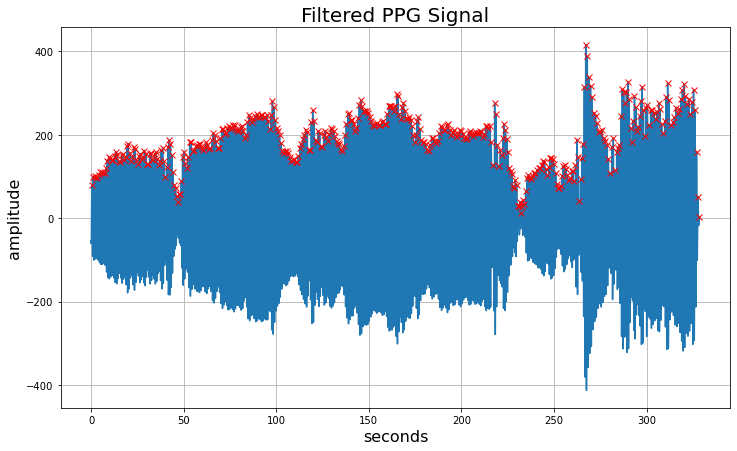

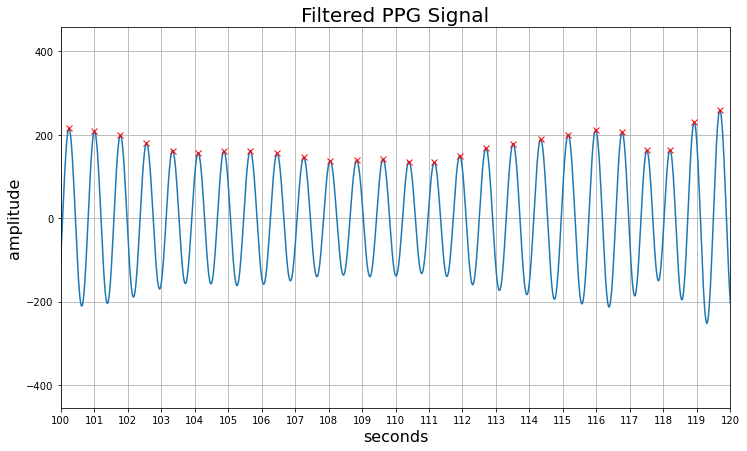

Average Heart Rate:  78.63129459028882/min


In [5]:
#code
from scipy.signal import argrelextrema
# https://openwritings.net/pg/python/python-find-peaks-and-valleys-chart-using-scipysignalargrelextrema

###_calucalate conversion factor to convert RR_intervals in seconds_###
sig_len = len(filtered_PPG)
#print(sig_len)
sig_len_seconds = sig_len/Fs
#print(sig_len_seconds)
factor = sig_len_seconds/sig_len
#print(factor)

def interval_calculation(data):
    tmp_interval = 0
    for i in range (0,len(data)-1):
        interval = data[i+1]-data[i]
        tmp_interval += interval
        i+=1
    avg_interval = tmp_interval/len(data)
    return avg_interval
        

RR_intervals = argrelextrema(filtered_PPG, np.greater)
RR_intervals = RR_intervals[0]

#convert intervals indexes in seconds
RR_intervals_seconds = RR_intervals*factor

peak_x = RR_intervals_seconds
peak_y = filtered_PPG[RR_intervals]

seconds_time=np.linspace(0,(len(filtered_PPG)/Fs),len(filtered_PPG))

###_filtered_PPG_with_peaks_###
plt.figure(figsize=(12,7))
plt.plot(seconds_time,filtered_PPG)
#plt.plot(filtered_PPG)
plt.title("Filtered PPG Signal",fontsize=20)
plt.xlabel("seconds",fontsize=16)
plt.ylabel("amplitude",fontsize=16)
plt.xticks(np.arange(0,(len(filtered_PPG)/Fs)+1,step=50))
plt.plot(peak_x,peak_y,"rx")
plt.grid()
plt.show()

###_filtered_PPG_signal_with_peaks_small_window_###
plt.figure(figsize=(12,7))
plt.plot(seconds_time,filtered_PPG)
#plt.plot(filtered_PPG)
plt.title("Filtered PPG Signal",fontsize=20)
plt.xlabel("seconds",fontsize=16)
plt.ylabel("amplitude",fontsize=16)
plt.xticks(np.arange(0,(len(filtered_PPG)/Fs)+1,step=1))
plt.plot(peak_x,peak_y,"rx")
plt.xlim([100,120])
plt.grid()
plt.show()


avg_peak_intervals = interval_calculation(RR_intervals_seconds)
#print(avg_peak_intervals)
HeartRate = 60.0/avg_peak_intervals 
print("Average Heart Rate: ", HeartRate, end='')
print("/min")

## Observations: 
 In the second figure, We can even know that the wave speed is 78/min(which is really close the real heart rate) by only 
 observing the second figure through our eyes. With the calculation, we gain the final heart rate.

# 6- Calculate SDNN and RMSSD
* AVNN is average of the time interval between successive normal heart beats. 
* SDNN is standard deviation of the time interval between successive normal heart beats (i.e. the RR-intervals).
* RMSSD is the Root mean square of successive RR interval differences.

* Calculate AVNN, SDNN and RMSSD from the “RR_intervals” variable. 
* These are heart rate variability parameters. Report the AVNN, SDNN and RMSSD values. 
* RMSSD formula can be found in https://www.biopac.com/application/ecg-cardiology/advanced-feature/rmssd-for-hrv-analysis/

* Note: Time unit for intervals should be in millisecond.
   
   HINT:
        Use np.diff(RR_intervals) to calculate the difference between successive rr intervals
        Use np.std() for SDNN
        

In [6]:
#code
AVNN = avg_peak_intervals

print("AVNN: ", AVNN)

RR_intervals_diff = np.diff(RR_intervals_seconds)

SDNN = np.std(RR_intervals_diff)

print("SDNN: ", SDNN)

N = len(RR_intervals)

RMSSD = np.sqrt((1/(N-1)) * np.mean(np.square(np.diff(RR_intervals_seconds))))

print("RMSSD: ", RMSSD)

AVNN:  0.7630549682875266
SDNN:  0.06458478502028234
RMSSD:  0.037057937013691145


## Observations:
    The overall frequency is 0.763, which seems a precise freq. of heart rate, because the SDNN is not large.
    The RMSSD and SDNN are all really small => there's not many over values.